## Adaptive Real time learning for Analyzing Customer Churn

Churning (or) customers leaving a company for the competition is one of the most important challenges faced by most of the enterprises. Businesses in the consumer market have to deal with churn else it will directly impacts on company revenue. By effectively predicting the customers who will churn, companies can take necessary actions in order to retain customers.

Although there are many machine learning techniques that are used now to predict customer churn, these techniques have a number of limitations like:

1. They tend to be batch-based: all the data to be used for the modeling must be available upfront for the model construction and many of them cannot work incrementally, i.e., incorporate into the model information arrived after it has been built; the model construction is computationally costly.

2. Reasons for customer churn in the market is highly and unpredictably dynamic and depends on factors that change from time to time in reaction to market conditions, product or price changes, or sociological phenomena. Hence model should be able to add and delete effect of features in the model on fly in real time.

3. Model should have the power to automatically identify the best features that cause churn in real time and should be able to make the changes in real time instead of training the whole data.

The problem is particularly acute in sectors such as the telecommunications market (say, companies to which customers subscribe for mobile phone service), which are aﬀected by high customer churn rate. Telcos also face the challenge of dealing with large amounts of information generated by the mobile users every second. 

In this context, models built earlier in the past can quickly or gradually get out of sync with the current customer patterns, resulting in suboptimal churn prediction rate and therefore revenue loss. This is one of the main concerns in many enterprises today. An obvious solution is to rebuild the models periodically (like every other day or week), but this typically either requires human analyst time (which is slow and expensive) or automatizing decisions such as when and on which amount data to retrain new models and what features to be selected for model training.



### ARTML for predicting Customer Churn

ARTML with its power to build the models in real time and with its capacity to accomodate huge amounts of data patterns can help solve this problem. This can also find the best features that impacts the model in real time and can rebuild the model accordingly on the fly by deleting and adding the features for making predictions. Also, they can respond to business events the moment they happen, rather than acting on them retrospectively. ARTML also has the power to run on Distributed processing systems to improve processing speeds and to accomodate huge data. By using artml predictive analytics, companies can differentiate from their competitors by taking real time decisions.

Let us see how we can use artml library for predicting Customer Churn in real time.

### Data preparation
The dataset is gathered from IBM watson analytics blog article on using Customer Behavior Data to Improve Customer Retention. This dataset clearly shows the potential of artml in real world.

Data Source:
[IBM_dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/)

Let's start by importing some libraries and examining the data.

In [1]:
# Importing all the required libraries
import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('customerchurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Binning of Categorical Features

Binning and all the preprocessing techniques can be done in real time. Suppose if the dataset is having high dimensional features then even PCA can be applied in real time (use PCA function in artml library) to get the features in new dimension with shows the greatest variance.

In [4]:
bins = [0, 12, 24, 36, 48, 60, 75]
labels = [1,2,3,4,5,6]
df['tenure_binned'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [5]:
df = df.drop('TotalCharges', axis = 1)
bins = [18, 36, 54, 72, 90, 120]
labels = [1,2,3,4,5]
df['MonthlyCharges_binned'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)

In [6]:
df = df.drop('MonthlyCharges', axis = 1)
df = df.drop('tenure', axis = 1)
df = df.drop('customerID', axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
df_churn = df.apply(LabelEncoder().fit_transform)

In [8]:
y = df_churn['Churn']
X = df_churn.drop('Churn', axis =1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [10]:
X_train['Churn'] = y_train

In [11]:
#Importing the artml library
from artml import bet

In [12]:
#creating the basic elemensts table for the dataset.
BET =  bet.create_bet(X_train)

### Data Exploration in real time

In [13]:
#Importing artml explore for calculating univariate & bivariate statistics
from artml.explore import stats

In [14]:
#Finding the Univariate statistics for the dataset.
stats.univariate(BET)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_binned,MonthlyCharges_binned,Churn
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
Mean,0.516227,0.160243,0.485193,0.302434,0.905274,0.953144,0.874848,0.792089,0.913387,0.897160,0.797769,0.991684,0.999391,0.694929,0.585598,1.569168,2.196552,2.117647,0.262677
Variance,0.249737,0.134565,0.249781,0.210968,0.085753,0.903078,0.546406,0.738315,0.774040,0.770966,0.740644,0.781472,0.781541,0.693139,0.242673,1.137305,3.813092,2.329364,0.193678
Standard_deviation,0.499737,0.366832,0.499781,0.459312,0.292836,0.950304,0.739193,0.859252,0.879795,0.878046,0.860607,0.884009,0.884048,0.832549,0.492618,1.066445,1.952714,1.526225,0.440089
coeff_of_variation,96.805559,228.921522,103.006640,151.871844,32.347818,99.702073,84.493861,108.479241,96.322253,97.869523,107.876726,89.142274,88.458648,119.803526,84.122233,67.962435,88.899063,72.071756,167.539542
skewness,-0.064982,1.853512,0.059291,0.860792,-2.769606,0.093498,0.203045,0.412590,0.169211,0.201181,0.400906,0.016195,0.001185,0.620215,-0.347736,-0.167147,0.338357,-0.210384,1.079178
Kurtosis,-1.996182,1.435798,-1.996889,-1.259292,5.671866,-1.886392,-1.151988,-1.521617,-1.687169,-1.673374,-1.532771,-1.720181,-1.720484,-1.278099,-1.879461,-1.208655,-0.959476,-1.431457,-0.835544


The above calculated Univariate statistics gives basic understanding of the data and all of features of the dataset which can be updated in real time and can be seen on a dashboard as they get updated. These summarised statistics are important in any domain for understanding and exploring the total data.

In [15]:
#Finding Bivariate statistics like correlation to understand which feaures are correlating with the target variable
stats.correlation(BET)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_binned,MonthlyCharges_binned,Churn
gender,1.000000,-0.000907,-0.013657,0.004688,-0.005436,0.003096,0.002478,-0.022611,-0.026099,-0.013532,-0.019017,-0.012780,-0.015359,-0.000290,-0.015118,0.009312,0.004942,-0.016332,-0.016153
SeniorCitizen,-0.000907,1.000000,0.012942,-0.217807,0.001574,0.127438,-0.041240,-0.127257,-0.011047,-0.015590,-0.150500,0.024126,0.044084,-0.150762,0.157570,-0.035073,0.003320,0.215227,0.151383
Partner,-0.013657,0.012942,1.000000,0.449389,0.024372,0.155919,0.002945,0.158858,0.164308,0.167785,0.130508,0.139979,0.124163,0.303573,-0.019568,-0.165339,0.368889,0.106525,-0.146932
Dependents,0.004688,-0.217807,0.449389,1.000000,-0.010199,-0.013541,0.043375,0.159837,0.101465,0.076617,0.137793,0.047658,0.027928,0.247641,-0.108587,-0.048711,0.173448,-0.112966,-0.163217
PhoneService,-0.005436,0.001574,0.024372,-0.010199,1.000000,-0.015950,0.382842,-0.008137,0.011457,-0.002387,0.000449,0.054157,0.044438,0.002938,0.014728,0.006366,-0.007879,0.276820,0.015221
MultipleLines,0.003096,0.127438,0.155919,-0.013541,-0.015950,1.000000,-0.105948,0.007942,0.129552,0.133274,0.022144,0.172900,0.195052,0.120889,0.165202,-0.173033,0.342834,0.413150,0.026520
InternetService,0.002478,-0.041240,0.002945,0.043375,0.382842,-0.105948,1.000000,-0.027554,0.028869,0.047674,-0.016190,0.099602,0.092382,0.092542,-0.145212,0.093192,-0.031861,-0.294398,-0.049214
OnlineSecurity,-0.022611,-0.127257,0.158858,0.159837,-0.008137,0.007942,-0.027554,1.000000,0.181980,0.178946,0.278063,0.057808,0.061517,0.365575,-0.145564,-0.082700,0.310262,-0.056519,-0.285236
OnlineBackup,-0.026099,-0.011047,0.164308,0.101465,0.011457,0.129552,0.028869,0.181980,1.000000,0.185139,0.187701,0.139647,0.146237,0.281836,-0.023377,-0.108087,0.353606,0.112123,-0.193226
DeviceProtection,-0.013532,-0.015590,0.167785,0.076617,-0.002387,0.133274,0.047674,0.178946,0.185139,1.000000,0.244934,0.275640,0.301212,0.352208,-0.033343,-0.132665,0.358300,0.151309,-0.168932


#### Real time correlation Heatmap

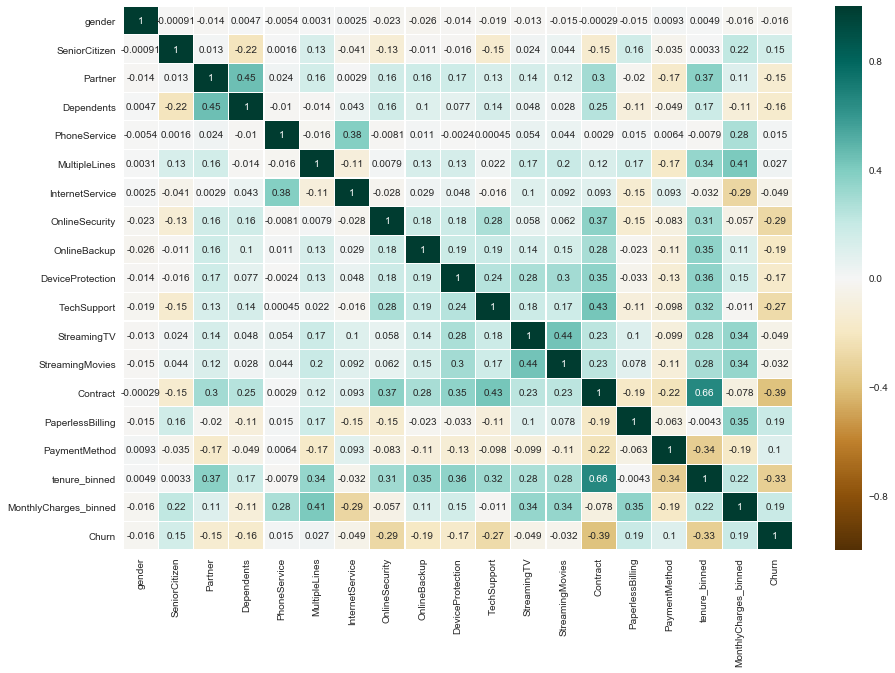

In [16]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(stats.correlation(BET), cmap = "BrBG",annot=True, linewidths=.1,ax=ax)

### Modeling

LDA is one of the classification model which gives good prediction accuracies in most of the cases. Hence LDA is chosen for making predictions about the Customer churn detections. Import LDA from the artml library for making predictions as shown below.

In [17]:
#importing lda model from the artml library
from artml.models import lda

In [18]:
#fit the training data with lda
lda = lda.LinearDiscriminantAnalysis()
lda.fit(BET, 'Churn')

#### Testing on new Data

In [19]:
#use lda predict function for making the predictions
y_pred = lda.predict(X_test)

In [20]:
#Import accuracy_score from artml for finding the accuracy of the model
from artml.metrics import scores
scores.accuracy(y_test, y_pred)

79.649787032655

### Real time feature selection to improve Churn prediction

In most of the cases customer data is very huge and not all features can be used for making churn predictions. In all the traditional ML approaches feature selection is done when the model is initially built combined with the domain knowledge. But as time progresses there might be some new variables which are significant for target prediction. The reason is that churn is a temporal effect and the factors contributing to churn are usually in transient states. What leads a customer to consider leaving today might be different tomorrow, and it certainly will be different six months from now. Therefore, a probabilistic model is a necessity.

Conventional ML approaches lack the true power of feature selection because model cannot be updated to consider new set of features time to time. 

using artml we can use the exsisting model for selecting the best features and then update the model based on these features to make better predictions. this process is continous and model gets upgraded everytime to always make best decisions.

We are performing feature selection using lda model, precisely by calculating mahalanobis distance for different features in predicting the target. Read documentation to know more about how to implement these. 

In [21]:
#Importing feature_selection algorithm from artml library
from artml.feature_selection import mahalanobis_features
best = mahalanobis_features.mahalanobis_selection()

In [22]:
BET =  bet.create_bet(X_train)
features = best.forward_selection(BET,'Churn', alpha=1.01)
features.append('Churn')

In [23]:
#First select the part of BET table with the best features
BET_best= BET.loc[features]
BET_best= BET_best[features]

In [24]:
#importing lda model from the artml library
from artml.models import lda

In [25]:
#fit the training data with lda
lda = lda.LinearDiscriminantAnalysis()
lda.fit(BET_best, 'Churn')

In [26]:
#predicting and finding accuracies on the testing dataset with the new model
features.remove('Churn')
y_pred = lda.predict(X_test[features])
scores.accuracy(y_test, y_pred)

80.07572172266919

After feature selection and updating model with new features we can see that there is increase in accuracy by approx. 0.7% which is significant. Accuracy obtained here is on par with many of the complex ML algorithms.

### Model Evaluation

The acuracy of the basic model that we created is 80.075% even without any feature engineering. However, the most important metric in churn is the misclassification rate: that is, of the top N churners as predicted by the classifier, which of them actually did not churn, and yet received special treatment? or who are the customers that we didnt predict and still on churn. AUC curve shows the misclassification rate which is found to be approx. 74% which is good considering the tradtional standards.

The model perfomance can be further improved when new features are created with feature engineering techniques combined with domain knowledge.

In [27]:
from sklearn import metrics
y = np.array(y_test)
pred = np.array(y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
metrics.auc(fpr, tpr)

0.73869067429187263

In [28]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1346  193]
 [ 228  346]]


In [29]:
sensitivity = TP / float(FN + TP)
print(sensitivity*100)

60.2787456446


In [30]:
specificity = TN / (TN + FP)
print(specificity*100)

87.4593892138


Here the specificity shows the churn rate. And in 87.459% of the cases we were able to predict customer churn in real time which shows the poer of the model. Using this special plans can be provided for the customer to avoid churning. 

### Updating Model in Real Time

As the new labelled data gets generated, The model perfomance can be improved by training the model with new data and by deleting the effects of old data in the model in real time. Learn and forget functions in artml library helps to update BET in real time with the data. Once the BET table gets updated then the model is automatically upgraded on the fly.

Also, artml library has the power to incorporate and delete certain features in the model in real time. As we are updating the effect of new data into the model we can perform real time feature selection using arml and hence update the model with new features whenever required.

Although we can use Forget and Learn functions for training model with data in real time, What data to be added to the model and what data needs to be deleted should be decided based on domain knowledge and also by checking model perfomance

Use learn, forget, grow, delete and feature_selection functions from artml library for performing these tasks.

### Discussion 

All the steps mentioned above can be automated in an pipeline which makes the process self sustaining. This mentioned framework  is appied only on a sample dataset. We look foward to apply this in real scenario on a Big data. The model and tasks can be built even better for each specific Business case making it more powerful. Contact us for any Industrial consultations.

----------------------------------------------------------------------------------------------------------------------------